In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#loading the data
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Mall_Customers.csv')
print("shape of the data = ", df.shape)
df.head()

shape of the data =  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

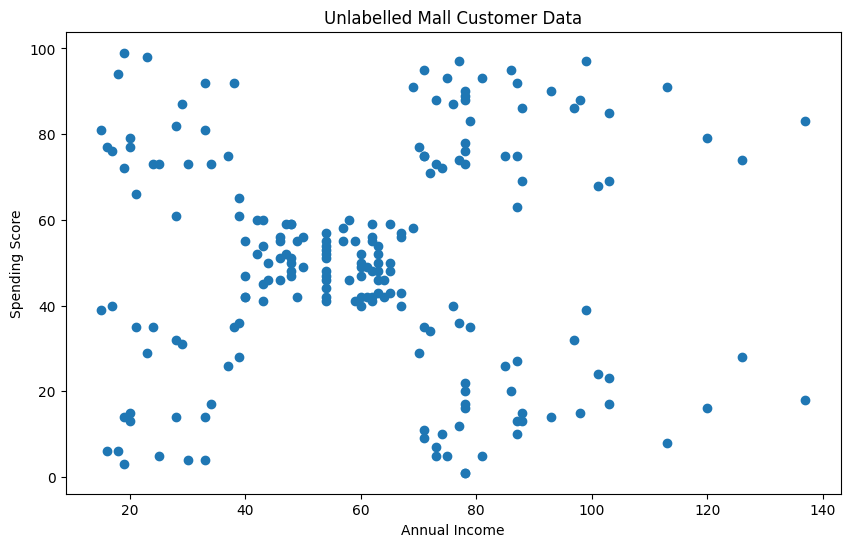

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data')

In [ ]:
#since we are using only last two columns let's create 2D array of these columns
X = df.iloc[:, [3,4]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

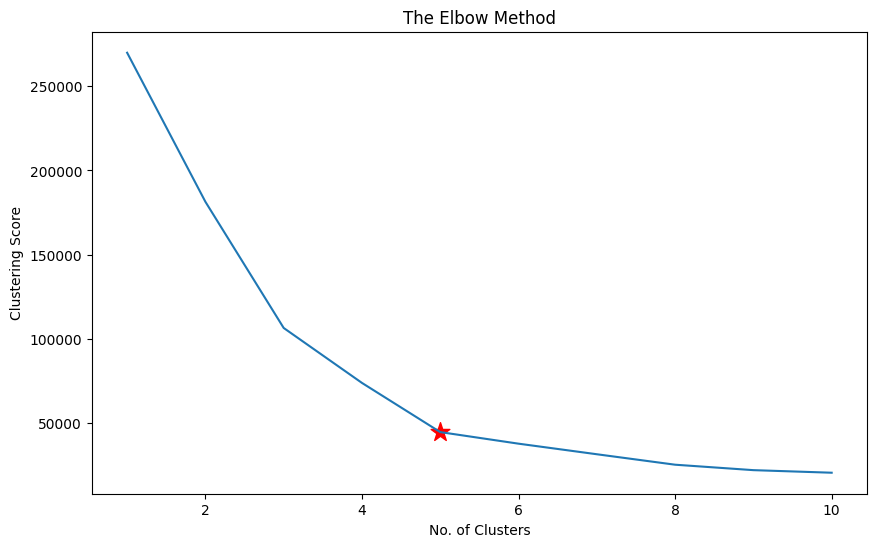

In [ ]:
#we can identify  5 clusters here at first so let's consider value of K=5
#we'll try identifying this using elbow method
clustering_score = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'random', random_state= 42)
  kmeans.fit(X)
  clustering_score.append(kmeans.inertia_)
  # inertia_ = Sum of squared distances of samples to their closest cluster center.
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()


In [ ]:

kmeans = KMeans(n_clusters=5, random_state=42)
#let's compute K-means clustering
kmeans.fit(X)
#computing cluster centers and predicting cluster index for each sample
pred = kmeans.predict(X)
pred


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
# Let's add it to original dataset for better understanding
df['Cluster'] = pd.DataFrame(pred, columns= ['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
df


Number of data points in each cluster= 
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


Text(0.5, 1.0, 'Customer Clusters')

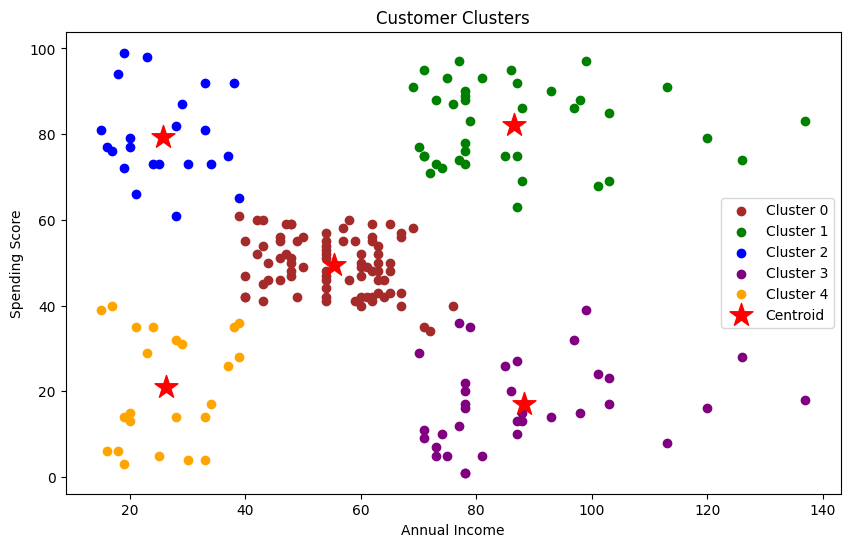

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

In [ ]:
def plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color):
    """
This function shows how the centroids move during the K-Means process.

Inputs:
* centroid_history: A list or array that stores all centroid positions at each step.
  For example, if there are 5 clusters, the first 5 points are the initial centroids.
  After every K-Means iteration, new centroid positions are added to this list.

* n_clusters: The total number of clusters (centroids).

* centroid_sets: The number of times the centroids were updated — basically,
  the number of iterations in K-Means (including the initial random positions).

* cluster_color: A color dictionary so that each centroid and its path have the same color.

Output:
* A plot showing the movement (path) of each centroid across iterations.
"""

    c_x = [] # To store centroid X coordinated
    c_y=[]   # To store the centroid Y coordinates
    for i in range(0, n_clusters):
        cluster_index = 0
        for j in range(0, centroid_sets):
           c_x = np.append(c_x, centroid_history[:,0][i + cluster_index])
           c_y = np.append(c_y, centroid_history[:,1][i + cluster_index])
           cluster_index = cluster_index + n_clusters
            # if there are 5 clusters then first set contains initial cluster cordinates and then k_means loop will keep appending new cluster coordinates for each iteration

        plt.plot(c_x, c_y, c= cluster_color['c_' + str(i)], linestyle='--')

        # Reset coordinate arrays to avoid continuous lines
        c_x = []
        c_y=[]


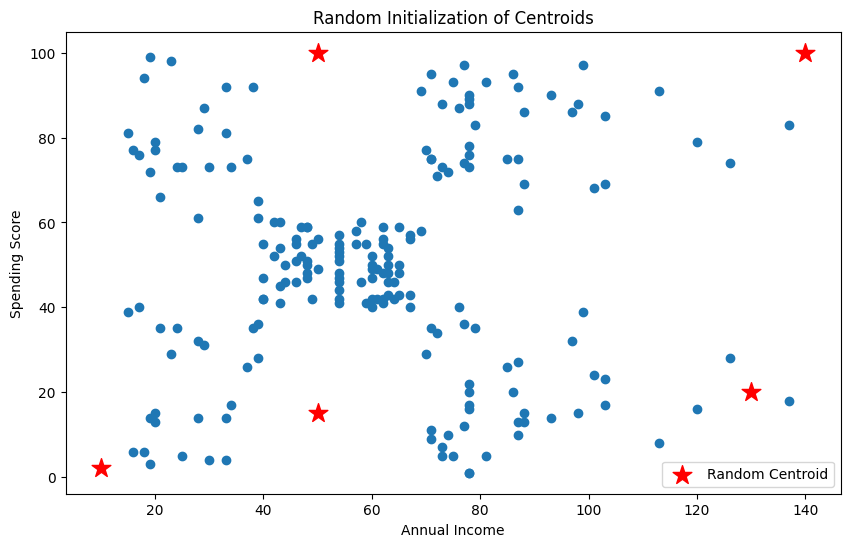

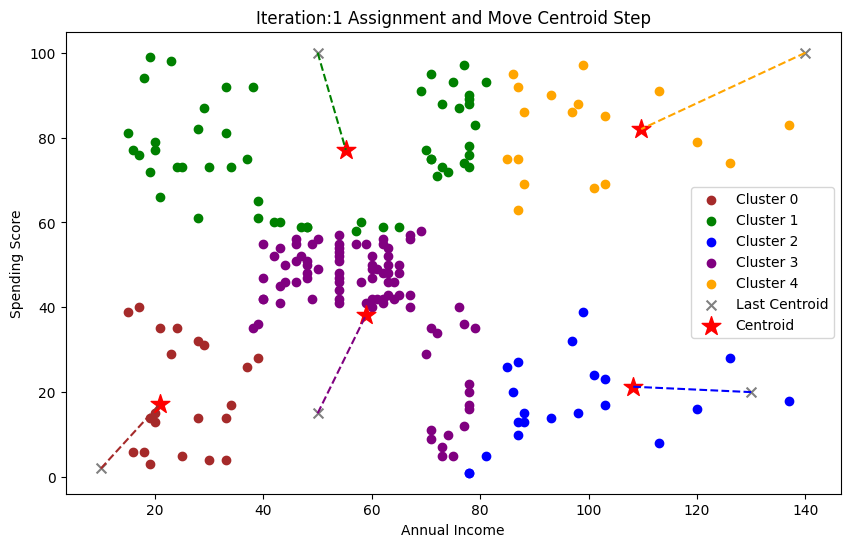

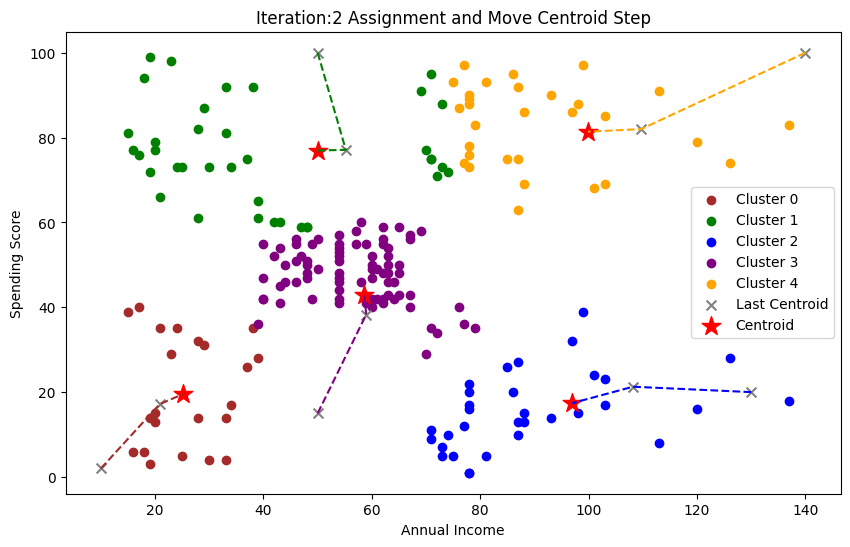

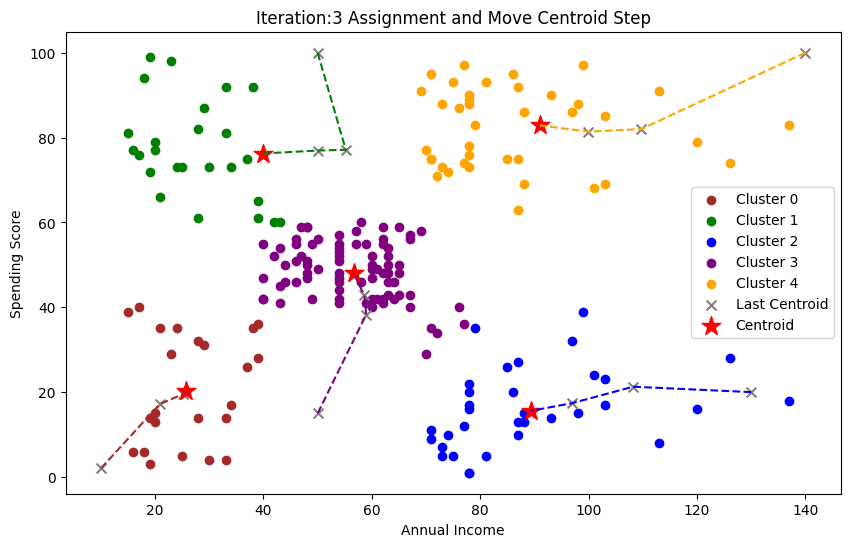

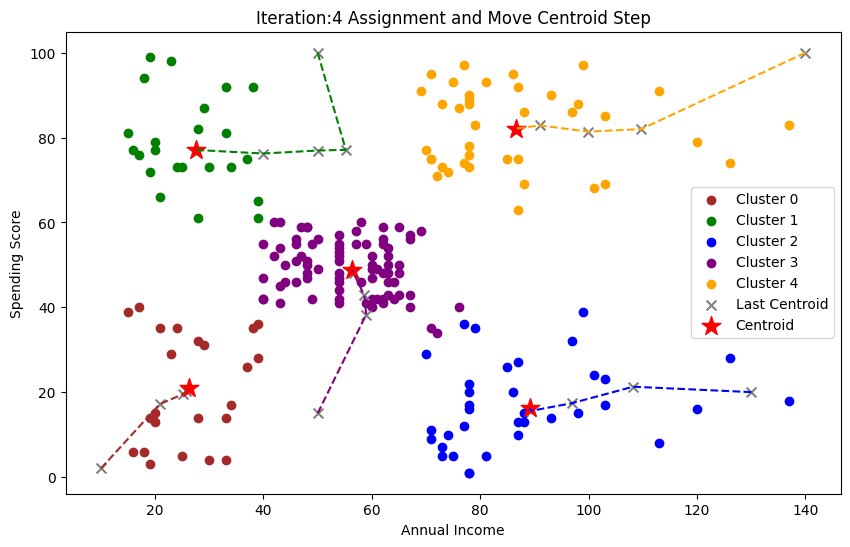

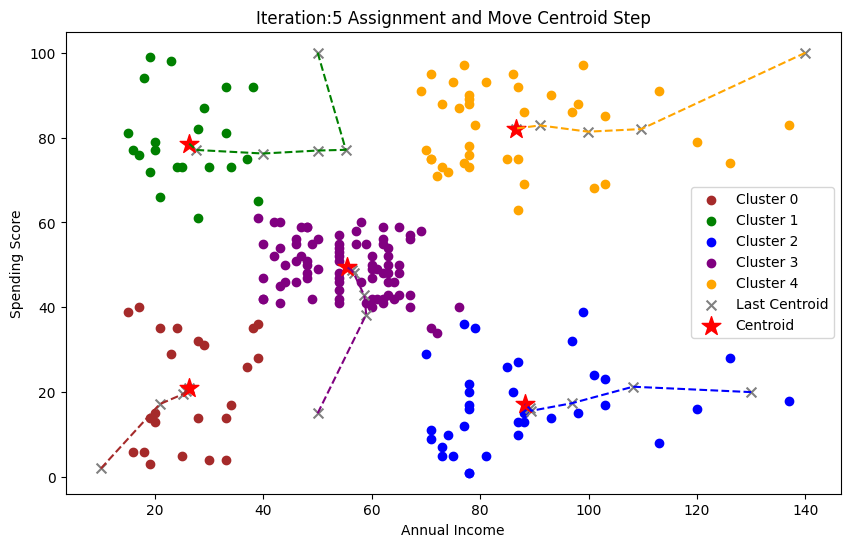

In [ ]:
plt.figure(figsize=(10,6))

# Random Initialization of Centroids
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
initial_centroid = np.array([[10, 2], [50,100], [130,20], [50,15], [140,100]])

plt.scatter(initial_centroid[:,0], initial_centroid[:, 1],s = 200, c = 'red', label = 'Random Centroid', marker='*')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Random Initialization of Centroids')

# K-Means loop of assignment and move centroid steps
centroid_history = []
centroid_history = initial_centroid
#
cluster_color= {'c_0':'brown','c_1':'green','c_2':'blue','c_3':'purple','c_4':'orange'}
n_clusters = 5
for i in range(1,6):
    kmeans= KMeans(n_clusters, init= initial_centroid, n_init= 1, max_iter= i, random_state = 42)  #n_init= 1 since our init parameter is array

    # Compute cluster centers and predict cluster index for each sample
    pred = kmeans.fit_predict(X)

    plt.figure(figsize=(10,6))
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

    plt.scatter(centroid_history[:,0], centroid_history[:, 1],s = 50, c = 'gray', label = 'Last Centroid', marker='x')

    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 200, c = 'red', label = 'Centroid', marker='*')

    centroid_history = np.append(centroid_history, kmeans.cluster_centers_, axis=0)

    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.title('Iteration:' + str(i) + ' Assignment and Move Centroid Step')

    centroid_sets = i + 1 # Adding one for initial set of centroids
    plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color)

In [ ]:
#adding business meaning and demographic depth to the analysis
df.groupby('Cluster')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,81.0,42.716049,16.447822,18.0,27.00,46.0,54.00,70.0
1,39.0,32.692308,3.728650,27.0,30.00,32.0,35.50,40.0
2,22.0,25.272727,5.257030,18.0,21.25,23.5,29.75,35.0
3,35.0,41.114286,11.341676,19.0,34.00,42.0,47.50,59.0
4,23.0,45.217391,13.228607,19.0,35.50,46.0,53.50,67.0


/tmp/ipython-input-4238602735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=df, palette='coolwarm')


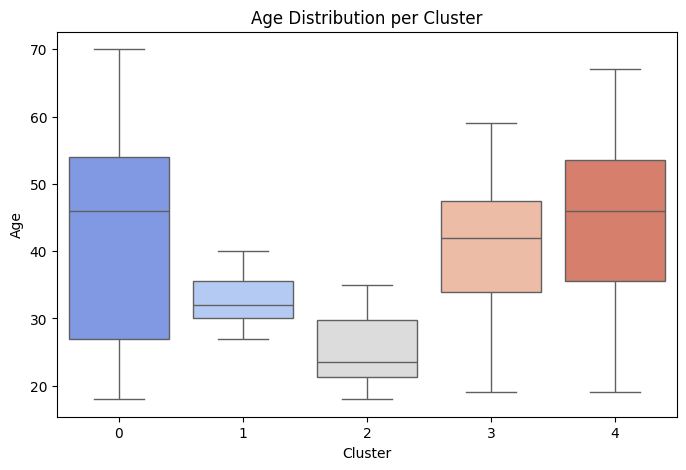

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution per Cluster')
plt.show()

In [ ]:
pd.crosstab(df['Cluster'], df['Gender'], normalize='index') * 100


Gender,Female,Male
Cluster,,
0,59.259259,40.740741
1,53.846154,46.153846
2,59.090909,40.909091
3,45.714286,54.285714
4,60.869565,39.130435


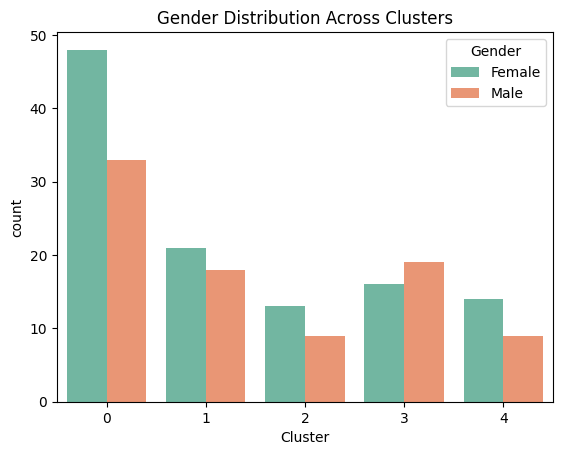

In [ ]:
sns.countplot(x='Cluster', hue='Gender', data=df, palette='Set2')
plt.title('Gender Distribution Across Clusters')
plt.show()
